# Two qubit quantum states & gates, Multi qubit system generalization

In [1]:
import qiskit
qiskit.__version__

'0.17.4'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ,QuantumRegister,ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit_textbook.tools import array_to_latex
from IPython.display import Image
#Inorder to get exact visulization of Quntum circuit execution, results, etc
from qiskit.visualization import plot_bloch_multivector,plot_state_qsphere,plot_histogram

# What quantum mechanics is there in quantum computing that I must remember?

In [4]:
#So how is a qubit created?
Image(url= "drWvi.png", width=700, height=400)

In [5]:
#Anharmonic Oscillator (Joshephen Junction)
Image(url= "R.png", width=400, height=200)

## Revise single qubit 


In [6]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf8\x00\x00\x01\xf8\x08\x06\x00\x00\x00\xa6(\xff…

In [7]:
#General preview of Applying single qubit gates and it's effect on qubit state
from IPython.display import Image
Image(url= "quantumgates.png", width=800, height=100)

# Understanding qubits in Qiskit
## Single qubit Hadamard gate

A Hadamard gates takes a pure |0> or |1> state and moves it to superposition state. \
There is no classical gate equivalent of Hadamard gate. Thus, this gate is purely quantum gate. \
Algebra:
$H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$;

In [8]:
simulator_q = Aer.get_backend('qasm_simulator')
# statevector simulator executes a single shot of a Qiskit QuantumCircuit & returns final quantum statevector of the simulation
simulator_s= Aer.get_backend('statevector_simulator') 
# Shows equivalent matrix representation
simulator_u = Aer.get_backend('unitary_simulator')
#Eigenvalue problem
# H|psi> = E|psi
Ax = \labmda x


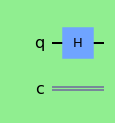

outputstate:
 [0.707+0.j 0.707+0.j]
UnitaryMatrix:
 [[ 0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j]]
counts:
 {'0': 513, '1': 511}


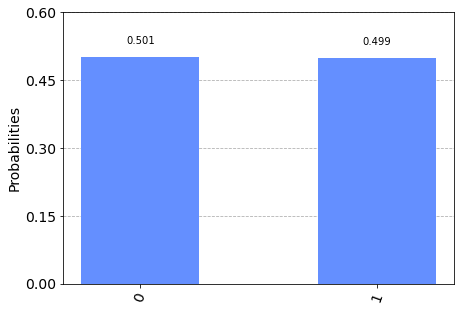

In [9]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)
style = {'backgroundcolor': 'lightgreen'}
display (circuit.draw(output='mpl',style=style))
#Statevector part
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
print ('outputstate:\n',(outputstate))
#unitary vector part
result=execute(circuit,simulator_u).result()
unitary=result.get_unitary(circuit)
print ('UnitaryMatrix:\n',(np.round(unitary,3)))
#Now Quasm Simulator part where we need to measure
circuit.measure(0,0)
result2=execute(circuit,simulator_q).result()
counts=result2.get_counts(circuit)
print ("counts:\n",result2.get_counts(circuit))
display (plot_histogram(counts))



$
Initial state:|0> \\  
After: H= \frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1> $( You can see this happening from the histrogram plot)$\\    \newline
            H = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  & 1 \\
    1 & -1
\end{bmatrix}\\ |1 > = \begin{bmatrix}
    1  \\
    0
\end{bmatrix} ; |0> = \begin{bmatrix}
    0\\
    1
\end{bmatrix}$
            

## Single qubit with Pauli X and H gate

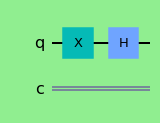

outputstate:
 [ 0.707+0.j -0.707+0.j]
UnitaryMatrix:
 [[ 0.70710678+0.00000000e+00j  0.70710678+8.65956056e-17j]
 [-0.70710678+8.65956056e-17j  0.70710678+0.00000000e+00j]]
counts:
 {'0': 479, '1': 545}


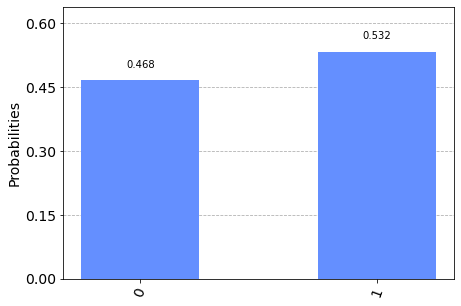

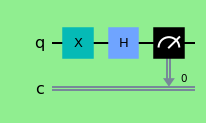

In [10]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
circuit.h(0)
style = {'backgroundcolor': 'lightgreen'}
display (circuit.draw(output='mpl',style=style))
#Statevector part
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
print ('outputstate:\n',outputstate)
#unitary vector part
result=execute(circuit,simulator_u).result()
unitary=result.get_unitary(circuit)
print ('UnitaryMatrix:\n',unitary)
#Now Quasm Simulator part where we need to measure
circuit.measure(0,0)
result2=execute(circuit,simulator_q).result()
counts=result2.get_counts(circuit)
print ("counts:\n",result2.get_counts(circuit))
display (plot_histogram(counts))
style = {'backgroundcolor': 'lightgreen'}
circuit.draw(output='mpl',style=style)

### Let's see this mathematically in terms of Matrix multiplication

$ 
H \otimes PauliX  =  \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix}\begin{bmatrix}
    0  &   1 \\
    1  &   0
\end{bmatrix}  = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
-1 & 1
\end{bmatrix}$

# Two (and more) Qubit gates 

## Visualizing Two qubit gates

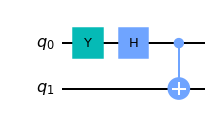

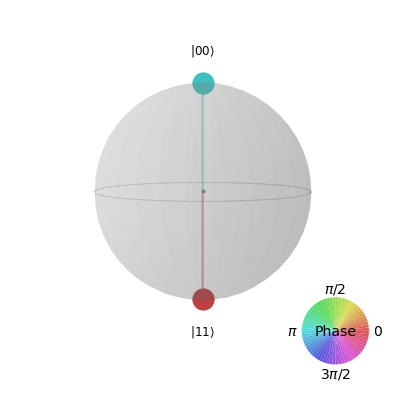

<IPython.core.display.Math object>

'In the bloch Sphere we can clearly see phase of each state corresponding to the output state given below.'

In [11]:
qc = QuantumCircuit(2)
qc.y(0)
qc.h(0)   # Apply Hadamard Gate
qc.cx(0,1)  # Apply CNOT

display(qc.draw('mpl')) #draw quantum circuit

final_state = execute(qc,simulator_s).result().get_statevector()
display(plot_state_qsphere(final_state))
array_to_latex(final_state)
"In the bloch Sphere we can clearly see phase of each state corresponding to the output state given below."

### Two qubit gates with H on first qubit

outputstate:
 [0.707+0.j 0.707+0.j 0.   +0.j 0.   +0.j]
UnitaryMatrix:
 [[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j]]
counts:
 {'01': 498, '00': 526}


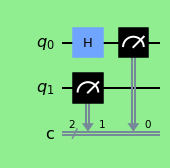

In [12]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
#Statevector part
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
print ('outputstate:\n',outputstate)
#unitary vector part
result=execute(circuit,simulator_u).result()
unitary=result.get_unitary(circuit)
print ('UnitaryMatrix:\n',np.round(unitary,3))
#Now Quasm Simulator part where we need to measure
circuit.measure([0,1],[0,1])
result2=execute(circuit,simulator_q).result()
print ("counts:\n",result2.get_counts(circuit))
style = {'backgroundcolor': 'lightgreen'}
circuit.draw(output='mpl',style=style)


Manual Approch to determine Unitary Matrix: \
$I \otimes H  =  \begin{bmatrix}
    1  &   0 \\
    0  &   1
\end{bmatrix} \otimes \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix}  = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 & 0 & 0\\
1 & -1 & 0 & 0\\
0 & 0 & 1 & 1 \\
0 & 0 & 1 & -1
\end{bmatrix}$\\

If the H-gate were on 2nd qubit, It will be:
$H \otimes I  = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix} \otimes \begin{bmatrix}
    1  &   0 \\
    0  &   1
\end{bmatrix}  = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{bmatrix}$

### Two qubits with single H gate on each qubit

outputstate:
 [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
UnitaryMatrix:
 [[ 0.5+0.j  0.5-0.j  0.5-0.j  0.5-0.j]
 [ 0.5+0.j -0.5+0.j  0.5-0.j -0.5+0.j]
 [ 0.5+0.j  0.5-0.j -0.5+0.j -0.5+0.j]
 [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5-0.j]]
counts:
 {'01': 263, '00': 274, '11': 249, '10': 238}


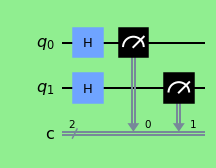

In [13]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.h(1)
#Statevector part
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
print ('outputstate:\n',outputstate)
#unitary vector part
result=execute(circuit,simulator_u).result()
unitary=result.get_unitary(circuit)
print ('UnitaryMatrix:\n',np.round(unitary,3))
#Now Quasm Simulator part where we need to measure
circuit.measure([0,1],[0,1])
result2=execute(circuit,simulator_q).result()
print ("counts:\n",result2.get_counts(circuit))
style = {'backgroundcolor': 'lightgreen'}
circuit.draw(output='mpl',style=style)

Basis Vectors for 2 qubits are as follows:\
$
|00> = \begin{bmatrix}
    1  \\
    0 \\
    0\\
    0
\end{bmatrix} ; |01> = \begin{bmatrix}
    0\\
    1\\
    0\\
    0
\end{bmatrix} ; |10> = \begin{bmatrix}
    0  \\
    0 \\
    1\\
    0
\end{bmatrix} ; |11> = \begin{bmatrix}
    0\\
    0\\
    0\\
    1
\end{bmatrix}$

This is a tensor product of two Hadamard transform. Lets apply it to |00> 
$(\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>) \otimes (\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>) = \frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> + \frac{1}{{2}}|11>$
$H_2|00>  = \frac{1}{2} \begin{bmatrix}
    1  &  1  &  1  &  1 \\
    1  &  -1  &  1  &  -1 \\
    1  &  1  &  -1  &  -1 \\
    1  &  -1  &  -1  &  1 \\
\end{bmatrix}\begin{bmatrix} 
    1  \\
    0 \\
    0\\
    0
    \end{bmatrix}
    = \begin{bmatrix}
    \frac{1}{2} \\
    \frac{1}{2} \\
    \frac{1}{2}\\
    \frac{1}{2}
\end{bmatrix}$\\
$
=  \frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> + \frac{1}{{2}}|11>$

outputstate:
 [ 0.5+0.j -0.5+0.j  0.5+0.j -0.5+0.j]
UnitaryMatrix:
 [[ 0.5+0.j  0.5+0.j  0.5-0.j  0.5-0.j]
 [-0.5+0.j  0.5+0.j -0.5+0.j  0.5-0.j]
 [ 0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]
 [-0.5+0.j  0.5+0.j  0.5-0.j -0.5+0.j]]
counts:
 {'00': 261, '11': 249, '01': 247, '10': 267}


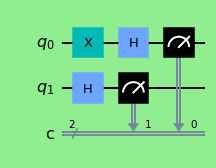

In [14]:
# Two qubits with X on first qubit and H on both

circuit = QuantumCircuit(2, 2)
circuit.x(0)
circuit.h(0)
circuit.h(1)
#Statevector part
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
print ('outputstate:\n',outputstate)
#unitary vector part
result=execute(circuit,simulator_u).result()
unitary=result.get_unitary(circuit)
print ('UnitaryMatrix:\n',np.round(unitary,3))
#Now Quasm Simulator part where we need to measure
circuit.measure([0,1],[0,1])
result2=execute(circuit,simulator_q).result()
print ("counts:\n",result2.get_counts(circuit))
style = {'backgroundcolor': 'lightgreen'}
circuit.draw(output='mpl',style=style)

In [15]:
# HW For you: Calculate the equivalent Unitary Matrix of this circuit!

# Introduction to CNOT gate (Designing a Bell State)

Truth Table:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-c3ow">(c,t)</th>
    <th class="tg-c3ow">CNOT(c,t)</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">00</td>
    <td class="tg-c3ow">00</td>
  </tr>
  <tr>
    <td class="tg-c3ow">01</td>
    <td class="tg-c3ow">01</td>
  </tr>
  <tr>
    <td class="tg-c3ow">10</td>
    <td class="tg-c3ow">11</td>
  </tr>
  <tr>
    <td class="tg-c3ow">11</td>
    <td class="tg-c3ow">10</td>
  </tr>
</tbody>
</table>

outputstate:
 [0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]
UnitaryMatrix:
 [[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j]]
counts:
 {'00': 493, '11': 531}


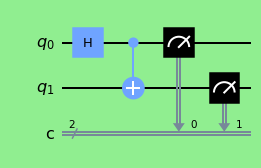

In [16]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
#Statevector part
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
print ('outputstate:\n',outputstate)
#unitary vector part
result=execute(circuit,simulator_u).result()
unitary=result.get_unitary(circuit)
print ('UnitaryMatrix:\n',np.round(unitary,3))
#Now Quasm Simulator part where we need to measure
circuit.measure([0,1],[0,1])
result2=execute(circuit,simulator_q).result()
print ("counts:\n",result2.get_counts(circuit))
style = {'backgroundcolor': 'lightgreen'}
circuit.draw(output='mpl',style=style)

Unitary Operator:

Order is CNOT $\otimes$ H.
$=1/\sqrt{2}\begin{bmatrix} 1 & 0 & 0 & 0 \\
                  0 & 0 & 0 & 1 \\
                  0 & 0 & 1 & 0 \\
                  0 & 1 & 0 & 0 \end{bmatrix} \begin{bmatrix} 1 & 1 & 0 & 0 \\
                  1 & -1 & 0 & 0 \\
                  0 & 0 & 1 & 1 \\
                  0 & 0 & 1 & -1 \end{bmatrix}=1/\sqrt{2}\begin{bmatrix} 1 & 1 & 0 & 0 \\
                  0 & 0 & 1 & -1 \\
                  0 & 0 & 1 & 1 \\
                  1 & -1 & 0 & 0 \end{bmatrix}$

This unitary operator operates on the initial state |00> to give final result.
$1/\sqrt{2}\begin{bmatrix} 1 & 1 & 0 & 0 \\
                  0 & 0 & 1 & -1 \\
                  0 & 0 & 1 & 1 \\
                  1 & -1 & 0 & 0 \end{bmatrix} \begin{bmatrix} 1\\0\\0\\0\\
\end{bmatrix}=1/\sqrt{2}\begin{bmatrix} 1\\0\\0\\1\\
\end{bmatrix}$ \

This final matrix is a superposition of two states:
$\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|11>$


Manual approach:\
initial state = |00>\
After application of Hadamard Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|10>$

After application of CNOT Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|11>$ (Since CNOT flips 0 to 1 if first qubit is 1)

In [17]:
# The state above is also known as Bell state. This state is also called entangled state. 

In [18]:
#HW for you: Apply a X-gate to second qubit in the above circuit. Then Use both matrix multiplication apporach as well as 
# manual approach to get the result. 

# Three qubit gate: Toffoli gate
Toffoli gate is a thee qubit gate similar to CNOT gate but with 2 control qubit and one target bit. Similar as CNOT gate, this gate flips the target gate if both of the control qubit is in state '1' otherwise left unchanged.
It's truth table is as follows:

| C1 	| C2 	| T 	| Out1 	| Out2 	| Out3 	|
|:--:	|:--:	|---	|------	|------	|------	|
|  0 	|  0 	| 0 	| 0    	| 0    	| 0    	|
|  0 	|  0 	| 1 	| 0    	| 0    	| 1    	|
|  0 	|  1 	| 0 	| 0    	| 1    	| 0    	|
|  0 	|  1 	| 1 	| 0    	| 1    	| 1    	|
| 1  	| 0  	| 0 	| 1    	| 0    	| 0    	|
| 1  	| 0  	| 1 	| 1    	| 0    	| 1    	|
| 1  	| 1  	| 0 	| 1    	| 1    	| 1    	|
| 1  	| 1  	| 1 	| 1    	| 1    	| 0    	|



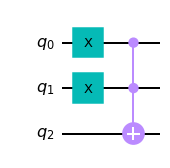

In [19]:
qc = QuantumCircuit(3)

qc.x(0)
qc.x(1)
tempqc = qc.copy()
qc.ccx(0,1,2)  # Apply Tofolli gate

display(qc.draw('mpl')) #draw quantum circuit

final_state = execute(qc,simulator_s).result().get_statevector()
initial_state = execute(tempqc,simulator_s).result().get_statevector()

In [20]:
array_to_latex(initial_state,pretext= "Intial state:")
array_to_latex(final_state,pretext= "Final state:")

<IPython.core.display.Math object>

<IPython.core.display.Math object>